In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("data.csv")

X=dataset.iloc[:,:-2]
y=dataset.iloc[:,-2]

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90


In [5]:
y

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [6]:
X = np.nan_to_num(X, nan=0)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
X_train


array([[-0.41425879, -0.50512499, -1.29214218, ..., -1.11279004,
         0.18727079,  0.39651419],
       [-0.40200818, -0.50512499, -0.16208345, ...,  0.15008778,
        -0.21208981,  0.3870674 ],
       [-0.39721053, -0.50512499, -0.60948856, ..., -1.0466393 ,
        -0.16771641,  0.42854113],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.76399522,
        -0.56707702,  0.35987906],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 , -2.87841346],
       [-0.39030549, -0.50512499, -0.37135358, ..., -0.13857001,
         1.16348561, -3.32828832]])

In [25]:
#Saving the scaled file
import pickle
pickle.dump(scaler,open('scaling2.pkl','wb'))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
print(regression.coef_)

[ 0.76139115  0.26724646  0.8061436  -0.63621633  1.82180511 -2.17844082
  1.66096428  0.65181713  0.21704876 -0.05042198  0.80103655 -0.61055547]


In [14]:
reg_pred=regression.predict(X_test)

In [15]:
reg_pred

array([ 9.886994  ,  4.14380964, 16.92829226,  7.08969275, 17.51139614,
       10.79688636, 13.24122407, 16.17190597, 14.82488901, 13.19131913,
       10.83499628, 12.49942323, 27.23747211,  9.85227724, 12.74619193,
       13.07653955, 16.16837003, 21.64177518,  2.79841699, 18.44779676,
        7.28488106,  7.16879524, 15.32884427, 11.93389241, 18.92969506,
       18.16405224,  9.39662787, 19.79920608, 10.46731354, 13.28672462,
       12.00468396,  9.72247352, 15.89128016, 20.561999  , 16.68148246,
       19.87469845,  7.60039629, 11.11960028,  8.44388667,  6.69997219,
       14.29512721,  8.53882153,  2.76268757,  9.62793144,  8.91518051,
       18.88804312, 15.28449419,  6.28613725, 15.3067167 ,  8.70849155,
       12.11927142,  5.18211722, 13.90431042, 10.55554135,  5.77266504,
       13.39223425, 18.46605946,  6.68312382,  8.15602036, 12.70146229,
       24.03913093,  5.693047  ,  6.69071573, 12.77902308,  8.70916671,
       12.30772092, 17.32027011,  7.7610065 ,  6.62908316, 20.65

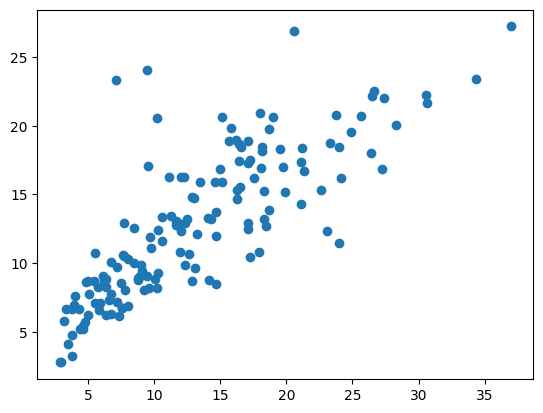

In [16]:
plt.scatter(y_test,reg_pred)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1068051658094205
18.462343426343505
4.296782915896904


In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)


0.641691366249369


Training with Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# Finding the r2 score for Decision tree Regressor
score=r2_score(y_test,y_pred)
print(score)

0.5403600260962742


Training with Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_train, y_train)

#Finding the r2 score for Random Forest Regressor

y_pred1 = regressor1.predict(X_test)
df = pd.DataFrame(y_pred1)

# Save to CSV
df.to_csv("house_price_predictions.csv", index=False)
print("Predictions saved to house_price_predictions.csv")
score=r2_score(y_test,y_pred1)
print(score)

print(X_test[0])
y_pred4 = regressor.predict(X_test[0].reshape(1,-1))
print(y_pred4)


Predictions saved to house_price_predictions.csv
0.7648044886260846
[-0.406801   -0.50512499 -1.02225586 -0.28154625 -0.40521827  0.16350077
  0.55383118 -0.52734802 -0.51436915 -0.66777595 -0.74457062  0.41241246]
[7.578]


Mean Squared Error of all the models

In [31]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred1)))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.481202531567141
4.866577812514987


In [33]:
input_data = X_train[0].reshape(1,-1)
scaler.transform(input_data.reshape(1,-1))

array([[ -0.4677396 ,  -0.52749891,  -1.79325642,  -1.36081455,
        -12.07564425,  -6.19505403,  -2.50360739,  -1.26434844,
         -1.18037974,  -2.4545243 ,  -8.02745672,  -4.13937047]])

In [37]:
y_pred3 = regression.predict(scaler.transform(input_data.reshape(1,-1)))
print(y_pred3)

[-6.17767199]


In [35]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))
## Prediction
pickled_model.predict(scaler.transform(input_data.reshape(1,-1)))


array([-6.17767199])